In [5]:
import pandas as pd
print(pd.__version__)

2.3.3


In [ ]:
# 질문1

# 1. 데이터 불러오기
file_path = r'C:\3.python\Python_WebScraping_Analysis\data\인구현황.csv'
df = pd.read_csv(file_path)

# 2. 불필요한 컬럼 삭제
df = df.drop('행정기관코드', axis=1)

# 3. 총인구수 기준 내림차순 정렬 후 상위 5개 출력
top5 = df.sort_values(by='총인구수', ascending=False).head(5)
top5[['행정기관', '총인구수']]

,행정기관,총인구수
0,전국,51217221
9,경기도,13694685
1,서울특별시,9331828
2,부산광역시,3266598
16,경상남도,3228380


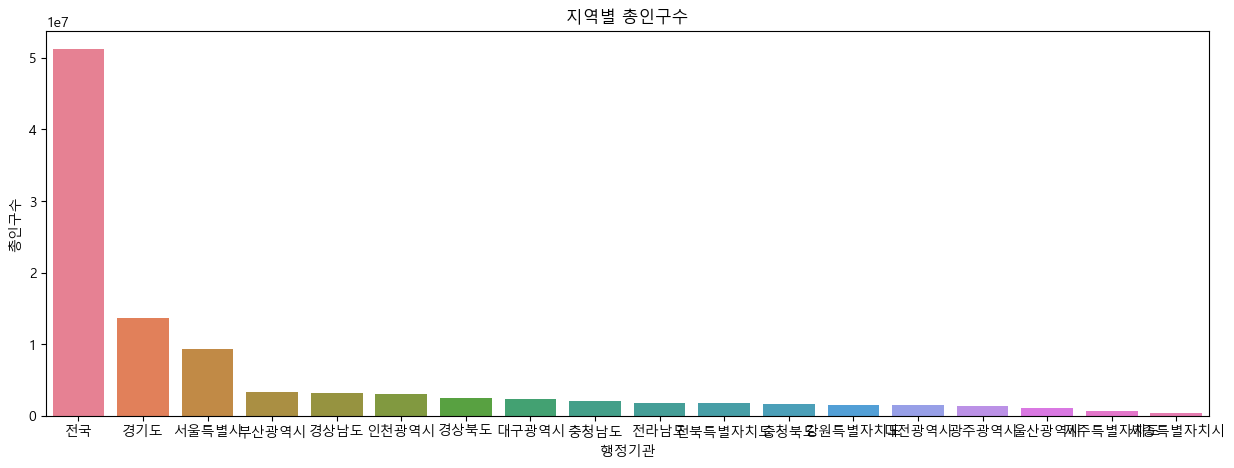

In [ ]:
#질문1-1
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 한글 깨짐 방지 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 2. 그래프 크기 설정
plt.figure(figsize=(15, 5))

# 3. 막대 그래프 그리기
# x축과 hue에 동일하게 '행정기관'을 지정하면 색상이 다채로워집니다.
sns.barplot(data=df.sort_values('총인구수', ascending=False), 
            x='행정기관', 
            y='총인구수', 
            hue='행정기관', 
            legend=False)

# 4. 제목 추가 및 출력
plt.title('지역별 총인구수')
plt.show()

In [ ]:
# 질문2
# '세대당인구'를 기준으로 내림차순(큰 순서) 정렬 후 상위 5개 추출
top5_household = df.sort_values(by='세대당 인구', ascending=False).head(5)

# 결과 출력 (행정기관과 세대당인구 컬럼만 보기 좋게 출력)
top5_household[['행정기관', '세대당 인구']]

,행정기관,세대당 인구
8,세종특별자치시,2.39
9,경기도,2.26
7,울산광역시,2.22
4,인천광역시,2.20
3,대구광역시,2.14


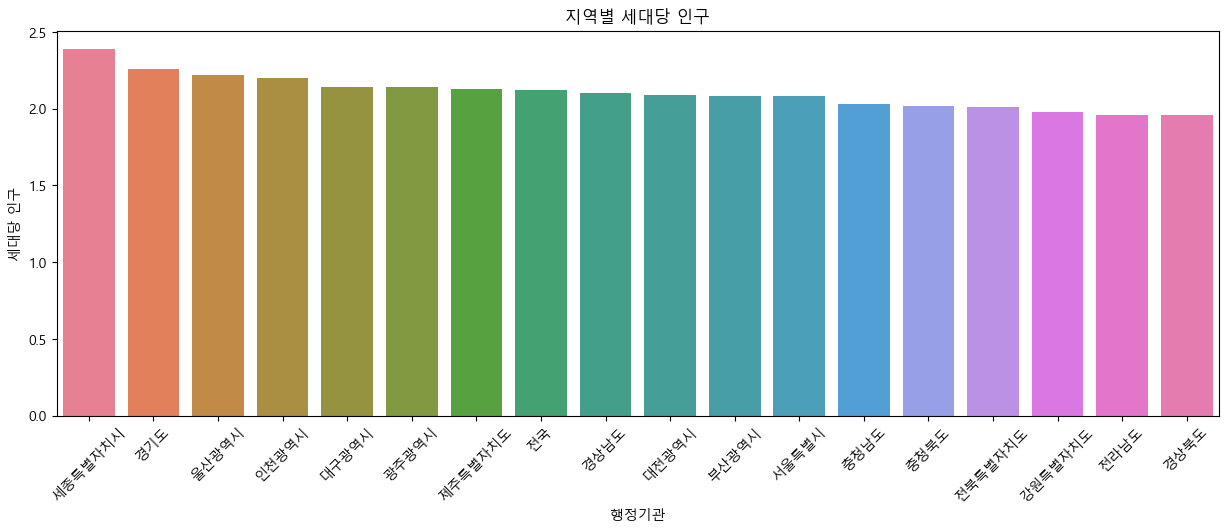

In [ ]:
# 질문2-1
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 그래프 크기 설정
plt.figure(figsize=(15, 5))

# 2. 막대 그래프 그리기
# '세대당인구'가 높은 순서대로 정렬하여 출력합니다.
sns.barplot(data=df.sort_values('세대당 인구', ascending=False), 
            x='행정기관', y='세대당 인구', hue='행정기관', legend=False)

# 3. 제목 및 레이블 설정
plt.title('지역별 세대당 인구')
plt.xticks(rotation=45) # 지역 이름이 길 경우를 대비해 살짝 돌려줍니다.
plt.show()

In [ ]:
# 질문3
# 1. 성비 컬럼 생성 (남자 인구수 / 여자 인구수)
# 보통 성비가 1보다 크면 남자가 더 많고, 1보다 작으면 여자가 더 많은 것입니다.
df['성비'] = df['남자 인구수'] / df['여자 인구수']

# 2. 성비가 높은 순(남성 비중이 높은 순)으로 정렬하여 확인
gender_ratio = df.sort_values(by='성비', ascending=False)

# 3. 주요 컬럼만 출력 (행정기관, 남자 인구수, 여자 인구수, 성비)
gender_ratio[['행정기관', '남자 인구수', '여자 인구수', '성비']]

,행정기관,남자 인구수,여자 인구수,성비
7,울산광역시,564888,533161,1.059507
12,충청남도,1096128,1040446,1.053517
11,충청북도,809920,781257,1.036688
15,경상북도,1280547,1250837,1.023752
14,전라남도,902380,886439,1.017983
16,경상남도,1626926,1601454,1.015906
10,강원특별자치도,763025,754741,1.010976
9,경기도,6882186,6812499,1.010229
17,제주특별자치도,335255,335113,1.000424
4,인천광역시,1509243,1511767,0.998330


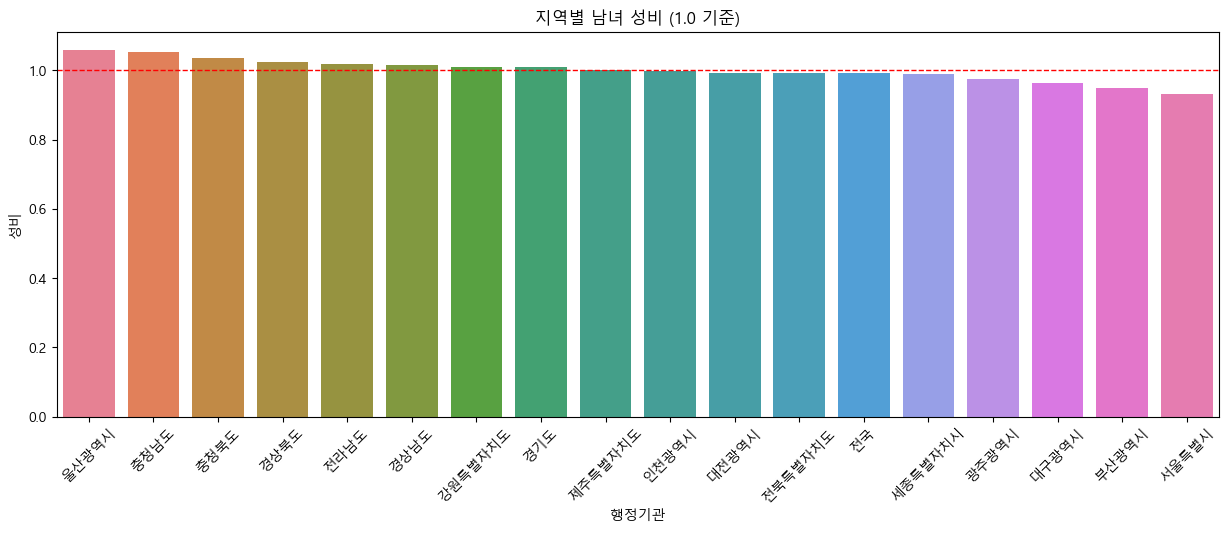

In [23]:
#질문3-1
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 그래프 크기 설정
plt.figure(figsize=(15, 5))

# 2. 막대 그래프 그리기 (성비 기준 내림차순 정렬)
# 성비가 1에 가까울수록 남녀 비율이 균등한 것입니다.
sns.barplot(data=df.sort_values('성비', ascending=False), 
            x='행정기관', 
            y='성비', 
            hue='행정기관', 
            legend=False)

# 3. 기준선 추가 (성비 1.0 지점에 점선 표시)
# 이 선보다 높으면 남자가 더 많고, 낮으면 여자가 더 많은 지역입니다.
plt.axhline(y=1.0, color='red', linestyle='--', linewidth=1)

# 4. 제목 및 레이블
plt.title('지역별 남녀 성비 (1.0 기준)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 질문 4
import numpy as np

# 1. '분류' 컬럼 만들기
# 남성인구가 여성인구보다 많으면 '남성초과', 아니면 '여성초과'
df['분류'] = np.where(df['남자 인구수'] > df['여자 인구수'], '남성초과', '여성초과')

# 2. 결과 확인 (행정기관별 분류 결과)
print(df[['행정기관', '남자 인구수', '여자 인구수', '분류']])

# 3. 각각 몇 군데인지 요약해서 보기
print("\n[ 전체 요약 ]")
print(df['분류'].value_counts())

       행정기관    남자 인구수    여자 인구수    분류
0        전국  25498324  25718897  여성초과
1     서울특별시   4505355   4826473  여성초과
2     부산광역시   1589912   1676686  여성초과
3     대구광역시   1159601   1204028  여성초과
4     인천광역시   1509243   1511767  여성초과
5     광주광역시    695224    713198  여성초과
6     대전광역시    717291    721866  여성초과
7     울산광역시    564888    533161  남성초과
8   세종특별자치시    194413    196272  여성초과
9       경기도   6882186   6812499  남성초과
10  강원특별자치도    763025    754741  남성초과
11     충청북도    809920    781257  남성초과
12     충청남도   1096128   1040446  남성초과
13  전북특별자치도    866030    872660  여성초과
14     전라남도    902380    886439  남성초과
15     경상북도   1280547   1250837  남성초과
16     경상남도   1626926   1601454  남성초과
17  제주특별자치도    335255    335113  남성초과

[ 전체 요약 ]


분류
여성초과    9
남성초과    9
Name: count, dtype: int64

In [33]:
# 1. 세대당 인구 전체 평균 구하기
avg_household = df['세대당 인구'].mean()
print(f"전체 세대당 인구 평균: {avg_household:.2f}\n")

# 2. 평균보다 높은 지역만 추출
over_avg_df = df[df['세대당 인구'] > avg_household]

# 3. 결과 출력 (정렬해서 보기 좋게)
over_avg_df.sort_values('세대당 인구', ascending=False)[['행정기관', '세대당 인구']]

전체 세대당 인구 평균: 2.11



,행정기관,세대당 인구
8,세종특별자치시,2.39
9,경기도,2.26
7,울산광역시,2.22
4,인천광역시,2.20
3,대구광역시,2.14
5,광주광역시,2.14
17,제주특별자치도,2.13
0,전국,2.12


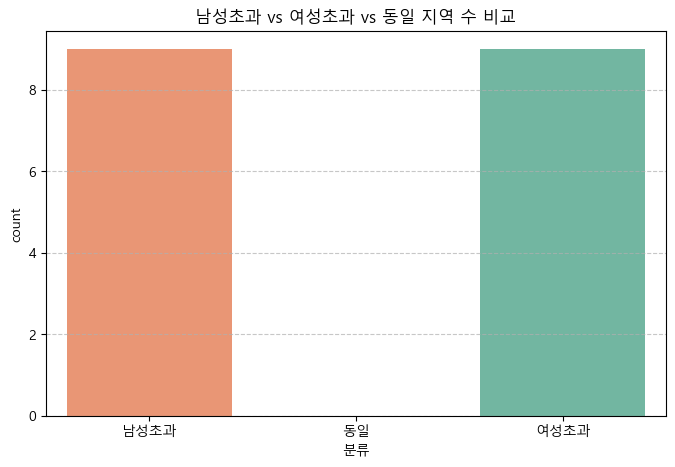

In [39]:

plt.figure(figsize=(8, 5))

# palette에 색상을 지정하여 남초, 여초, 동일을 구분하기 쉽게 합니다.
# order를 지정하면 막대 순서를 고정할 수 있습니다.
sns.countplot(data=df, 
              x='분류', 
              hue='분류', 
              palette='Set2', 
              order=['남성초과', '동일', '여성초과'], 
              legend=False)

plt.title('남성초과 vs 여성초과 vs 동일 지역 수 비교')
plt.grid(axis='y', linestyle='--', alpha=0.7) # 가로 점선을 넣어 가독성을 높임
plt.show()

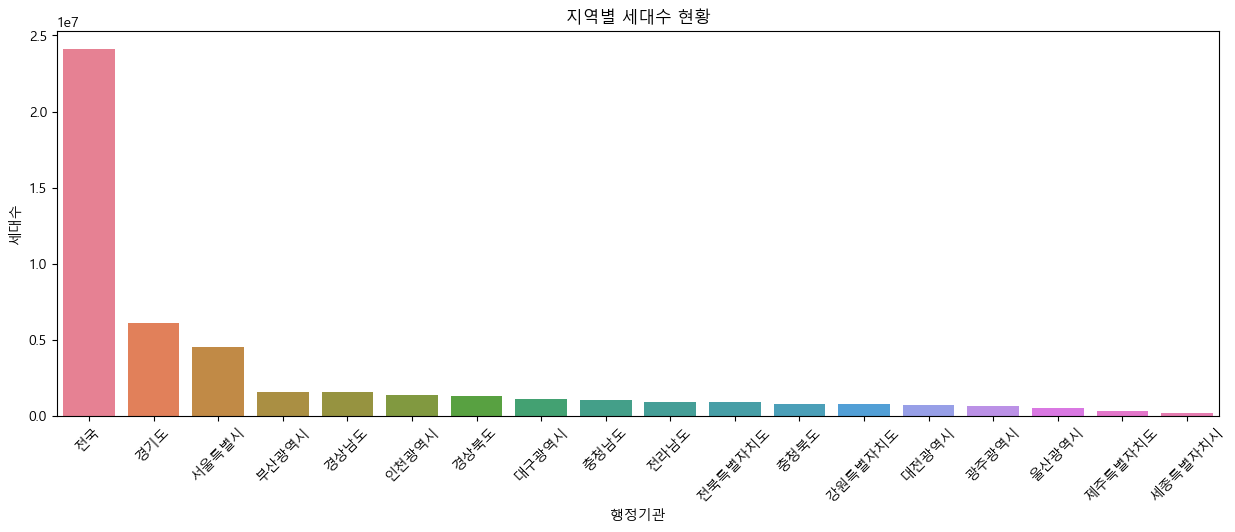

In [35]:
plt.figure(figsize=(15, 5))

# 세대수 기준으로 내림차순 정렬하여 시각화
sns.barplot(data=df.sort_values('세대수', ascending=False), 
            x='행정기관', 
            y='세대수', 
            hue='행정기관', 
            legend=False)

plt.title('지역별 세대수 현황')
plt.xticks(rotation=45)
plt.show()